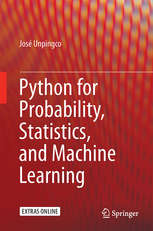

In [2]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [3]:
from __future__ import division
%pylab  inline

Populating the interactive namespace from numpy and matplotlib


# Worked Examples of Conditional Expectation and Mean Square Error Optimization

Brzezniak [[brzezniak1999basic]](#brzezniak1999basic) is a great book because it approaches
conditional expectation through a sequence of exercises, which is what we are
trying to do here. The main difference is that Brzezniak takes a more abstract
measure-theoretic approach to the same problems. Note that you *do* need to
grasp  measure theory for advanced areas in  probability, but for what we have
covered so far, working the same problems in his text using our methods is
illuminating. It always helps to have more than one way to solve *any* problem.
I urge you to get a copy of his book or at least look at some pages on Google
Books. I have numbered the examples corresponding to the book and tried to
follow its notation.  

## Example

This is Example 2.1 from Brzezniak.  Three coins, 10p, 20p and 50p are tossed.
The values of those coins that land heads up are totaled. What is the expected
total given that two coins have landed heads up?  In this case we have
we want to compute $\mathbb{E}(\xi|\eta)$ where

$$
\xi := 10 X_{10} + 20 X_{20} +50 X_{50}
$$

 where $X_i \in \{0,1\} $ and where $X_{10}$ is the
Bernoulli-distributed random variable corresponding to the 10p coin (and so
on). Thus, $\xi$ represents the total value of the heads-up coins. The $\eta$
represents the condition that only two of the three coins are heads-up,

$$
\eta := X_{10} X_{20} (1-X_{50})+ (1-X_{10}) X_{20} X_{50}+ X_{10} (1-X_{20}) X_{50}
$$

 and is a function that is non-zero *only* when two of the three coins lands
heads-up. Each triple term catches each of these three possibilities. For example,
the first term equals one when the 10p and 20p are heads up  and the 50p is
heads down. The  the remaining terms are zero.

To compute the conditional expectation, we want to find a function $h$ of
$\eta$ that minimizes the mean-squared-error (MSE),

$$
\mbox{MSE}= \sum_{X\in\{0,1\}^3} \frac{1}{2^3} (\xi-h(\eta))^2
$$

 where the sum is taken over all possible triples of outcomes for 
$\{X_{10},X_{20} ,X_{50}\}$ because each
of the three coins has a $\frac{1}{2}$ chance of coming up heads.

Now, the question boils down to how can we characterize the function $h(\eta)$?
Note that $\eta \mapsto \{0,1\}$ so $h$ takes on only two values.  So, the
orthogonal inner product condition is the following:

$$
\langle \xi -h(\eta), \eta \rangle = 0
$$

 But, because are only interested in $\eta=1$, this simplifies to

$$
\begin{align*}
\langle \xi -h(1), 1 \rangle &= 0  \\\
\langle \xi,1  \rangle &=\langle h(1),1  \rangle  
\end{align*}
$$

 This doesn't look so hard to evaluate but we have to compute the
integral over the set where $\eta=1$. In other words, we need the set of
triples $\{X_{10},X_{20},X_{50}\}$ where $\eta=1$. That is, we can
compute

$$
\int_{\{\eta=1\}} \xi dX = h(1)  \int_{\{\eta=1\}} dX
$$

  which is what Brzezniak does. Instead, we can define
$h(\eta)=\alpha \eta$ and then find $\alpha$. Re-writing the
orthogonal condition gives

$$
\begin{align*}
\langle \xi -\eta, \alpha\eta \rangle &= 0  \\\
\langle \xi, \eta \rangle &= \alpha \langle \eta,\eta \rangle  \\\
\alpha &= \frac{\langle \xi, \eta \rangle}{\langle \eta,\eta \rangle} 
\end{align*}
$$

 where

$$
\langle \xi, \eta \rangle =\sum_{X\in\{0,1\}^3} \frac{1}{2^3}(\xi\eta)
$$

 Note that we can just sweep over all triples
$\{X_{10},X_{20},X_{50}\}$ because the definition of $h(\eta)$ zeros out when
$\eta=0$ anyway.  All we have to do is plug everything in and solve. This
tedious job is perfect for Sympy.

In [4]:
import sympy as S
X10,X20,X50 = S.symbols('X10,X20,X50',real=True)
xi  = 10*X10+20*X20+50*X50 
eta = X10*X20*(1-X50)+X10*(1-X20)*(X50)+(1-X10)*X20*(X50)
num=S.summation(xi*eta,(X10,0,1),(X20,0,1),(X50,0,1))
den=S.summation(eta*eta,(X10,0,1),(X20,0,1),(X50,0,1))
alpha=num/den
print alpha # alpha=160/3

160/3


  This means that

$$
\mathbb{E}(\xi|\eta) = \frac{160}{3} \eta
$$

 which we can check with a quick simulation

In [5]:
>>> import pandas as pd
>>> d = pd.DataFrame(columns=['X10','X20','X50'])
>>> d.X10 = np.random.randint(0,2,1000)
>>> d.X10 = np.random.randint(0,2,1000)
>>> d.X20 = np.random.randint(0,2,1000)
>>> d.X50 = np.random.randint(0,2,1000)

**Programming Tip.**

The code above creates an empty Pandas data frame with the named columns.
The next four lines assigns values to each of the columns.



 The code above simulates flipping the three coins 1000
times. Each column of the dataframe is either `0` or `1`
corresponding to heads-down or heads-up, respectively. The
condition is that two of the three coins have landed heads-up.
Next, we can group the columns according to their sums. Note that
the sum can only be in $\{0,1,2,3\}$ corresponding to `0`
heads-up, `1` heads-up, and so on.

In [6]:
>>> grp=d.groupby(d.eval('X10+X20+X50'))

**Programming Tip.**

The `eval` function of the Pandas data frame takes the named
columns and evaluates the given formula. At the time of this
writing, only simple formulas involving primitive operations are
possible.



 Next, we can get the `2` group, which corresponds to
exactly two coins having landed heads up and then evaluate
the sum of the values of the coins. Finally, we can take the mean 
of these sums.

In [7]:
>>> grp.get_group(2).eval('10*X10+20*X20+50*X50').mean()
52.719999999999999

52.72

 The result is close to `160/3=53.33` which supports
the analytic result. The following code shows that we
can accomplish the same simulation using pure Numpy.

In [8]:
>>> import numpy as np
>>> from numpy import array
>>> x=np.random.randint(0,2,(3,1000))
>>> print np.dot(x[:,x.sum(axis=0)==2].T,array([10,20,50])).mean()
52.698998418555611

54.3817204301


52.69899841855561

 In this case, we used the Numpy dot product to compute
the value of the heads-up coins. The `sum(axis=0)==2` part selects
the columns that correspond to two heads-up coins. 

Still another way to get at the same problem is to forego the
random sampling part and just consider all possibilities
exhaustively using the `itertools` module in Python's standard
library.

In [9]:
>>> import itertools as it
>>> list(it.product((0,1),(0,1),(0,1)))
[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

 Note that we need to call `list` above in order to trigger the
iteration in `it.product`. This is because the `itertools` module is
generator-based so does not actually *do* the iteration until it is iterated
over (by `list` in this case).   This shows all possible triples
$(X_{10},X_{20},X_{50})$ where `0` and `1` indicate heads-down and heads-up,
respectively. The next step is to filter out the cases that correspond to two
heads-up coins.

In [10]:
>>> list(it.ifilter(lambda i:sum(i)==2,it.product((0,1),(0,1),(0,1))))
[(0, 1, 1), (1, 0, 1), (1, 1, 0)]

[(0, 1, 1), (1, 0, 1), (1, 1, 0)]

 Next, we need to compute the sum of the coins and combine
the prior code.

In [11]:
>>> map(lambda k:10*k[0]+20*k[1]+50*k[2],
...                   it.ifilter(lambda i:sum(i)==2,
...                              it.product((0,1),(0,1),(0,1))))
[70, 60, 30]

[70, 60, 30]

 The mean of the output is `53.33`, which is yet another way to get
the same result. For this example, we demonstrated the full spectrum of
approaches made possible using Sympy, Numpy, and Pandas. It is always valuable
to have multiple ways of approaching the same problem and cross-checking
the result. 

## Example

This is Example 2.2 from Brzezniak. Three coins, 10p, 20p and 50p are tossed as
before. What is the conditional expectation of the total amount shown by the
three coins given the total amount shown by the 10p and 20p coins only?  For
this problem,

$$
\begin{align*}
\xi := & 10 X_{10} + 20 X_{20} +50 X_{50}  \\\
\eta :=& 30 X_{10} X_{20} + 20 (1-X_{10}) X_{20} + 10 X_{10} (1-X_{20}) 
\end{align*}
$$

 which takes on four values $\eta \mapsto \{0,10,20,30\}$ and only
considers the 10p and 20p coins.  In contrast to the last problem, here we are
interested in $h(\eta)$ for all of the values of $\eta$. Naturally, there are
only four values for $h(\eta)$ corresponding to each of these four values.
Let's first consider $\eta=10$. The orthogonal condition is then

$$
\langle\xi-h(10),10\rangle = 0
$$

 The domain for $\eta=10$ is $\{X_{10}=1,X_{20}=0,X_{50}\}$ which we
can integrate out of the expectation below,

$$
\begin{align*}
\mathbb{E}_{\{X_{10}=1,X_{20}=0,X_{50}\}}(\xi-h(10)) 10  &=0 \\\ 
\mathbb{E}_{\{X_{50}\}}(10-h(10)+50 X_{50}) &=0  \\\
10-h(10) + 25 &=0 
\end{align*}
$$

 which gives $h(10)=35$. Repeating the same process for $\eta \in
\{20,30\}$ gives $h(20)=45$ and $h(30)=55$, respectively.  This is the approach
Brzezniak takes. On the other hand, we can just look at affine functions,
$h(\eta) = a \eta + b $ and use brute-force calculus.

In [12]:
>>> from sympy.abc import a,b
>>> h = a*eta + b
>>> eta = X10*X20*30 + X10*(1-X20)*(10)+ (1-X10)*X20*(20)
>>> MSE=S.summation((xi-h)**2*S.Rational(1,8),(X10,0,1),
...                 (X20,0,1),
...                 (X50,0,1))
>>> sol=S.solve([S.diff(MSE,a),S.diff(MSE,b)],(a,b))
>>> print sol
{b: 25, a: 1}

{b: 32, a: 64/3}


{b: 25, a: 1}

**Programming Tip.**

The `Rational` function from Sympy code expresses a rational number that Sympy
is able to manipulate as such. This is different that specifying a fraction
like `1/8.`, which Python would automatically compute as a floating point
number (i.e., `0.125`). The advantage of using `Rational` is that Sympy can
later produce rational numbers as output, which are sometimes easier to make
sense of.



  This means that

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\mathbb{E}(\xi|\eta) = 25+\eta
\label{_auto1} \tag{1}
\end{equation}
$$

  since $\eta$ takes on only four values, $\{0,10,20,30\}$, we can
write this out explicitly as

<!-- Equation labels as ordinary links -->
<div id="eq:ex21sol"></div>

$$
\begin{equation}
\mathbb{E}(\xi|\eta) =
\begin{cases} 
25 & \text{for}\: \eta=0  \\\
35 & \text{for}\: \eta=10 \\\
45 & \text{for}\: \eta=20 \\\
55 & \text{for}\: \eta=30 
\end{cases}
\end{equation}
\label{eq:ex21sol} \tag{2}
$$

 Alternatively, we can use orthogonal inner products to write out
the following conditions:

<!-- Equation labels as ordinary links -->
<div id="eq:ex22a"></div>

$$
\begin{equation}
\label{eq:ex22a} \tag{3}
\langle \xi-h(\eta), \eta \rangle = 0
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:ex22b"></div>

$$
\begin{equation}
\label{eq:ex22b} \tag{4}
\langle \xi-h(\eta),1\rangle = 0
\end{equation}
$$

 Writing these out and solving for $a$ and  $b$ is tedious and
a perfect job for Sympy. Starting with Equation ref{eq:ex22a},

In [13]:
>>> expr = expr=S.expand((xi-h)*eta)
>>> print expr
-100*X10**2*a + 100*X10**2 - 400*X10*X20*a + 400*X10*X20 + 500*X10*X50 
- 10*X10*b - 400*X20**2*a + 400*X20**2 + 1000*X20*X50 - 20*X20*b

30*X10**2*X20*X50*a - 10*X10**2*X20*a - 10*X10**2*X50*a + 100*X10**2 + 60*X10*X20**2*X50*a - 20*X10*X20**2*a - 30*X10*X20*X50*a + 400*X10*X20 + 500*X10*X50 - 10*X10*b - 20*X20**2*X50*a + 400*X20**2 + 1000*X20*X50 - 20*X20*b


-10*X10*b - 400*X20**2*a + 400*X20**2 + 1000*X20*X50 - 20*X20*b

 and then because $\mathbb{E}(X_i^2)=1/2=\mathbb{E}(X_i)$, we make the
following substitutions

In [14]:
>>> expr.xreplace({X10**2:0.5, X20**2:0.5,X10:0.5,X20:0.5,X50:0.5})
-350.0*a - 15.0*b + 725.0

-350.0*a - 15.0*b + 725.0

 We can do this for the other orthogonal inner product in Equation
ref{eq:ex22b} as follows,

**Programming Tip.**

Because Sympy symbols are hashable, they can be used as keys in Python
dictionaries as in the `xreplace` function above.

In [15]:
>>> print S.expand((xi-h)*1).xreplace({X10**2:0.5, 
...                                    X20**2:0.5,
...                                    X10:0.5,
...                                    X20:0.5,
...                                    X50:0.5})
-15.0*a - b + 40.0

-0.375*a - b + 40.0


-15.0*a - b + 40.0

 Then, combining this result with the previous one and solving 
for `a` and `b` gives,

In [16]:
>>> print S.solve([-350.0*a-15.0*b+725.0,-15.0*a-b+40.0])
{b: 25.0000000000000, a: 1.00000000000000}

{b: 25.0000000000000, a: 1.00000000000000}


{b: 25.0, a: 1.0}

 which again gives us the final solution,

$$
\mathbb{E}(\xi|\eta) = 25+ \eta
$$

  The following is a quick simulation to demonstrate this. We can
build on the Pandas dataframe we used for the last example and create
a new column for the sum of the 10p and 20p coins, as shown below.

In [17]:
>>> d['sm'] = d.eval('X10*10+X20*20')

 We can group this by the values of this sum,

In [18]:
>>> d.groupby('sm').mean()


,X10,X20,X50
sm,,,
0,0,0,0.464730
10,1,0,0.533597
20,0,1,0.509960
30,1,1,0.498039


 But we want the expectation of the value of the coins

In [19]:
>>> d.groupby('sm').mean().eval('10*X10+20*X20+50*X50')


sm
0     23.236515
10    36.679842
20    45.498008
30    54.901961
dtype: float64

 which is very close to our analytical result in Equation ref{eq:ex21sol}.

## Example

This is Example 2.3 paraphrased from Brzezniak. Given $X$ uniformly distributed
on $[0,1]$, find $\mathbb{E}(\xi|\eta)$ where

$$
\xi(x) = 2 x^2
$$

$$
\eta(x) =  
\begin{cases} 
1 & \mbox{if } x \in [0,1/3]  \\\
2 & \mbox{if } x \in (1/3,2/3)  \\\
0 & \mbox{if } x \in (2/3,1]
\end{cases}
$$

 Note that this problem is different from the previous two because the
sets that characterize $\eta$ are intervals instead of discrete points.
Nonetheless, we will eventually have three values for $h(\eta)$ because $\eta
\mapsto \{0,1,2\}$. For $\eta=1$, we have the orthogonal conditions,

$$
\langle \xi-h(1),1\rangle = 0
$$

 which boils down to

$$
\mathbb{E}_{\{x \in [0,1/3]\}}(\xi-h(1))=0
$$

$$
\int_0^{\frac{1}{3}}(2 x^2-h(1))dx = 0
$$

 and then by solving this for $h(1)$ gives $h(1)=2/24$. This is the way
Brzezniak works this problem. Alternatively, we can use $h(\eta) =  a + b\eta
+ c\eta^2$ and brute force calculus.  Note the the `Piecewise` object in
`sympy` is not complete at this point in its development, so we'll have to be
exceptionally verbose in the following,

In [20]:
x,c,b,a=S.symbols('x,c,b,a')
xi = 2*x**2

eta=S.Piecewise((1,S.And(S.Gt(x,0),
                         S.Lt(x,S.Rational(1,3)))),  #  0 < x < 1/3
                (2,S.And(S.Gt(x,S.Rational(1,3)),
                         S.Lt(x,S.Rational(2,3)))), # 1/3 < x < 2/3,
                (0,S.And(S.Gt(x,S.Rational(2,3)),
                         S.Lt(x,1)))) # 1/3 < x < 2/3
h = a + b*eta + c*eta**2 
J=S.integrate((xi-h)**2,(x,0,1))
sol=S.solve([S.diff(J,a), 
             S.diff(J,b),
             S.diff(J,c),
            ],
            (a,b,c))

In [21]:
>>> print sol

{c: 8/9, b: -20/9, a: 38/27}


In [22]:
>>> print S.piecewise_fold(h.subs(sol))

Piecewise((2/27, And(x < 1/3, x > 0)), (14/27, And(x < 2/3, x > 1/3)), (38/27, And(x < 1, x > 2/3)))


  Thus, collecting this result gives:

$$
\mathbb{E}(\xi|\eta) = \frac{38}{27} - \frac{20}{9}\eta + \frac{8}{9} \eta^2
$$

  which can be re-written as a piecewise function of x,

<!-- Equation labels as ordinary links -->
<div id="eq:ex23a"></div>

$$
\begin{equation}
\mathbb{E}(\xi|\eta(x)) =\begin{cases} \frac{2}{27} & \text{for}\: 0 < x < \frac{1}{3} \\\frac{14}{27} & \text{for}\: \frac{1}{3} < x < \frac{2}{3} \\\frac{38}{27} & \text{for}\: \frac{2}{3}<x < 1 \end{cases} 
\end{equation}
\label{eq:ex23a} \tag{5}
$$

Alternatively, we can use the orthogonal inner product conditions directly by
choosing $h(\eta)=c+\eta b +\eta^2 a$,

<!-- Equation labels as ordinary links -->
<div id="eq:ex23b"></div>

$$
\begin{align*}
\langle \xi-h(\eta),1\rangle = 0 \\\
\langle \xi-h(\eta),\eta\rangle = 0 \\\
\langle \xi-h(\eta),\eta^2\rangle = 0 
\end{align*}
\label{eq:ex23b} \tag{6}
$$

 and then solving for $a$,$b$, and $c$.

In [23]:
>>> x,a,b,c,eta = S.symbols('x,a,b,c,eta',real=True)
>>> xi  = 2*x**2
>>> eta=S.Piecewise((1,S.And(S.Gt(x,0),
...                      S.Lt(x,S.Rational(1,3)))),  #  0 < x < 1/3
...             (2,S.And(S.Gt(x,S.Rational(1,3)),
...                      S.Lt(x,S.Rational(2,3)))), # 1/3 < x < 2/3,
...             (0,S.And(S.Gt(x,S.Rational(2,3)),
...                      S.Lt(x,1)))) # 1/3 < x < 2/3

>>> h = c+b*eta+a*eta**2

 Then, the orthogonal conditions become,

In [24]:
>>> S.integrate((xi-h)*1,(x,0,1))
-5*a/3 - b - c + 2/3
>>> S.integrate((xi-h)*eta,(x,0,1))
-3*a - 5*b/3 - c + 10/27
>>> S.integrate((xi-h)*eta**2,(x,0,1))
-17*a/3 - 3*b - 5*c/3 + 58/81

-17*a/3 - 3*b - 5*c/3 + 0.716049382716049

 Now, we just combine the three equations and solve
for the parameters,

In [25]:
>>> eqs=[ -5*a/3 - b - c + 2/3,
...   -3*a - 5*b/3 - c + 10/27,
...   -17*a/3 - 3*b - 5*c/3 + 58/81]
>>> sol=S.solve(eqs)
>>> print sol
{a: 0.888888888888889, c: 1.40740740740741, b: -2.22222222222222}

{a: 0.888888888888889, c: 1.40740740740741, b: -2.22222222222222}


{a: 0.888888888888889, c: 1.40740740740741, b: -2.22222222222222}

 We can assemble the final result by substituting in the solution,

In [26]:
>>> print S.piecewise_fold(h.subs(sol))

Piecewise((0.0740740740740740, And(x < 1/3, x > 0)), (0.518518518518518, And(x < 2/3, x > 1/3)), (1.40740740740741, And(x < 1, x > 2/3)))


 which is the same as our analytic result in Equation ref{eq:ex23a},
just in decimal format.

**Programming Tip.**

The definition of Sympy's piecewise function is verbose because of the way
Python parses inequality statements. As of this writing, this has not been
reconciled in Sympy, so we have to use the verbose declaration.



To reinforce our result, let's do a quick simulation using Pandas.

In [27]:
>>> d = pd.DataFrame(columns=['x','eta','xi'])
>>> d.x = np.random.rand(1000)
>>> d.xi = 2*d.x**2

 Now, we can use the `pd.cut` function to group the `x`
values in the following,

In [28]:
>>> pd.cut(d.x,[0,1/3,2/3,1]).head()

0        (0.667, 1]
1    (0.333, 0.667]
2        (0, 0.333]
3        (0, 0.333]
4        (0, 0.333]
Name: x, dtype: category
Categories (3, object): [(0, 0.333] < (0.333, 0.667] < (0.667, 1]]

 Note that the `head()` call above is only to limit the printout shown.
The categories listed are each of the intervals for `eta` that we specified
using the `[0,1/3,2/3,1]` list. Now that we know how to use `pd.cut`, we
can just compute the mean on each group as shown below,

In [29]:
>>> d.groupby(pd.cut(d.x,[0,1/3,2/3,1])).mean()['xi']

x
(0, 0.333]        0.076390
(0.333, 0.667]    0.521691
(0.667, 1]        1.410679
Name: xi, dtype: float64

 which is pretty close to our analytic result in Equation
ref{eq:ex23a}. Alternatively, `sympy.stats` has some limited tools for the same
calculation.

In [30]:
>>> from sympy.stats import E, Uniform
>>> x=Uniform('x',0,1)
>>> E(2*x**2,S.And(x < S.Rational(1,3), x > 0))
2/27
>>> E(2*x**2,S.And(x < S.Rational(2,3), x > S.Rational(1,3)))
14/27
>>> E(2*x**2,S.And(x < 1, x > S.Rational(2,3)))
38/27

1.4074074074074074

 which again gives the same result still another way.

## Example

This is Example 2.4 from Brzezniak. Find $\mathbb{E}(\xi|\eta)$ for

$$
\xi(x) = 2 x^2
$$

<!-- Equation labels as ordinary links -->
<div id="eq:ex24"></div>

$$
\eta =
\begin{cases}2 & \mbox{if } 0 \le x < \frac{1}{2} \\ x & \mbox{if } \frac{1}{2} < x \le 1 \end{cases} 

\label{eq:ex24} \tag{7}
$$

 Once again, $X$ is uniformly distributed on the unit interval. Note
that $\eta$ is no longer discrete for every domain. For the domain $0 <x <
1/2$, $h(2)$ takes on only one value, say, $h_0$. For this domain, the
orthogonal condition becomes,

$$
\mathbb{E}_{\{\eta=2\}}((\xi(x)-h_0)2)=0
$$

 which simplifies to,

$$
\begin{align*}
\int_0^{1/2} 2 x^2-h_0 dx &= 0 \\\
\int_0^{1/2} 2 x^2 dx &= \int_0^{1/2} h_0 dx \\\
h_0 &= 2 \int_0^{1/2} 2 x^2 dx \\\
h_0 &= \frac{1}{6}
\end{align*}
$$

For the other domain where $\{\eta=x\}$ in Equation ref{eq:ex24}, we again 
use the orthogonal condition,

$$
\begin{align*}
\mathbb{E}_{\{\eta=x\}}((\xi(x)-h(x))x)&=0 \\\
\int_{1/2}^1 (2x^2-h(x)) x dx &=0 \\\
h(x) &= 2x^2
\end{align*}
$$

 Assembling the solution gives,

$$
\mathbb{E}(\xi|\eta(x)) =\begin{cases} \frac{1}{6} & \text{for}\: 0 \le x < \frac{1}{2} \\ 2 x^2 & \text{for}\: \frac{1}{2} < x \le 1 \end{cases}
$$

 although  this result is not explicitly written as a function of $\eta$.  

## Example

This is Exercise 2.6 in Brzezniak. Find $\mathbb{E}(\xi|\eta)$ where

$$
\xi(x) = 2 x^2
$$

$$
\eta(x) = 1 - \lvert 2 x-1 \rvert
$$

 and $X$ is uniformly distributed in the unit interval. We
can write this out as a piecewise function in the following,

$$
\eta =\begin{cases} 2 x & \text{for}\: 0 \le x < \frac{1}{2} \\ 2 -2x & \text{for}\: \frac{1}{2} < x \le 1 \end{cases}
$$

 The discontinuity is at $x=1/2$. Let's start with the $\{\eta=2x\}$ domain.

$$
\begin{align*}
\mathbb{E}_{\{\eta=2x\}}((2 x^2-h(2 x)) 2 x)& = 0 \\\
\int_{0}^{1/2} (2x^2-h(2 x) ) 2 x dx &=0 
\end{align*}
$$

 We can make this explicitly a function of $\eta$ by a change
of variables ($\eta=2x$) which gives

$$
\int_{0}^{1} (\eta^2/2-h(\eta))\frac{\eta}{2} d\eta =0
$$

 Thus, for this domain, $h(\eta)=\eta^2/2$. Note that due to the
change of variables, $h(\eta)$ is valid defined over $\eta\in[0,1]$.

For the other domain where $\{\eta=2-2x\}$, we have

$$
\begin{align*}
\mathbb{E}_{\{\eta=2-2x\}}((2 x^2-h(2-2x)) (2-2x))& = 0 \\\
\int_{1/2}^{1} (2 x^2-h(2-2x) ) (2-2x) dx &=0 
\end{align*}
$$

 Once again, a change of variables makes the $ \eta$ dependency 
explicit using $\eta=2-2x$ which gives

$$
\begin{align*}
\int_{0}^{1} ((2-\eta)^2/2-h(\eta) ) \frac{\eta}{2} d\eta &=0 \\\
h(\eta) &= (2-\eta)^2/2 
\end{align*}
$$

 Once again, the change of variables means this solution is valid
over $\eta\in[0,1]$. Thus, because both pieces are valid over the
same domain ($\eta\in[0,1]$), we can just add them to get the final solution,

$$
h(\eta) = \eta^2-2\eta+2
$$

 A quick simulation can help bear this out.

In [31]:
from pandas import DataFrame
import numpy as np
d = DataFrame(columns=['xi','eta','x','h','h1','h2'])
# 100 random samples
d.x = np.random.rand(100)
d.xi = d.eval('2*x**2')
d.eta =1-abs(2*d.x-1)
d.h1=d[(d.x<0.5)].eval('eta**2/2')
d.h2=d[(d.x>=0.5)].eval('(2-eta)**2/2')
d.fillna(0,inplace=True)
d.h = d.h1+d.h2
d.head()

,xi,eta,x,h,h1,h2
0,0.346459,0.832416,0.416208,0.346459,0.346459,0.000000
1,0.432610,0.930172,0.465086,0.432610,0.432610,0.000000
2,0.001143,0.047811,0.023905,0.001143,0.001143,0.000000
3,0.096686,0.439741,0.219870,0.096686,0.096686,0.000000
4,1.679429,0.167281,0.916359,1.679429,0.000000,1.679429


 Note that we have to be careful where we apply the individual
solutions using the slice `(d.x<0.5)` index. The `fillna` part ensures that the
default `NaN` that fills out the empty row-etries is replaced with zero before
combining the individual solutions. Otherwise, the `NaN` values would circulate
through the rest of the computation. The following is the
essential code that draws [Figure](#fig:Conditional_expectation_MSE_005).

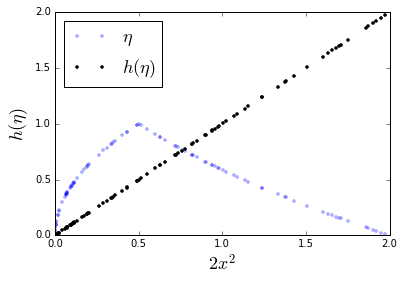

In [32]:
from matplotlib.pyplot import subplots
fig,ax=subplots()
ax.plot(d.xi,d.eta,'.',alpha=.3,label='$\eta$')
ax.plot(d.xi,d.h,'k.',label='$h(\eta)$')
ax.legend(loc=0,fontsize=18)
ax.set_xlabel('$2 x^2$',fontsize=18)
ax.set_ylabel('$h(\eta)$',fontsize=18)

**Programming Tip.**

Basic \LaTeX{} formatting works for the labels in [Figure](#fig:Conditional_expectation_MSE_005).  The `loc=0` in the `legend`
function is the code for the *best* placement for the labels in the legend. The
individual labels should be specified when the elements are drawn individually,
otherwise they will be hard to separate out later. This is accomplished using
the `label` keyword in the `plot` commands.

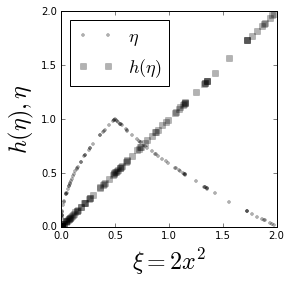

In [33]:
from matplotlib.pyplot import subplots
from pandas import DataFrame
import numpy as np

d = DataFrame(columns=['xi','eta','x','h','h1','h2'])
# 100 random samples
d.x = np.random.rand(100)
d.xi = d.eval('2*x**2')
d.eta =1-abs(2*d.x-1)
d.h1=d[(d.x<0.5)].eval('eta**2/2')
d.h2=d[(d.x>=0.5)].eval('(2-eta)**2/2')
d.fillna(0,inplace=True)
d.h = d.h1+d.h2

fig,ax=subplots()
_=ax.plot(d.xi,d.eta,'.k',alpha=.3,label=r'$\eta$')
_=ax.plot(d.xi,d.h,'ks',label=r'$h(\eta)$',alpha=.3)
_=ax.set_aspect(1)
_=ax.legend(loc=0,fontsize=18)
_=ax.set_xlabel(r'$\xi=2 x^2$',fontsize=24)
_=ax.set_ylabel(r'$h(\eta),\eta$',fontsize=24)
fig.tight_layout()
#fig.savefig('fig-probability/Conditional_expectation_MSE_Ex_005.png')

<!-- dom:FIGURE: [fig-probability/Conditional_expectation_MSE_Ex_005.png, width=500 frac=0.85]  The diagonal line shows where the conditional expectation equals the $\xi$ function. <div id="fig:Conditional_expectation_MSE_005"></div> -->
<!-- begin figure -->
<div id="fig:Conditional_expectation_MSE_005"></div>

<p>The diagonal line shows where the conditional expectation equals the $\xi$ function.</p>
<img src="fig-probability/Conditional_expectation_MSE_Ex_005.png" width=500>

<!-- end figure -->


[Figure](#fig:Conditional_expectation_MSE_005) shows the $\xi$ data plotted
against $\eta$ and $h(\eta) = \mathbb{E}(\xi|\eta)$. Points on the diagonal
are points where $\xi$ and $\mathbb{E}(\xi|\eta)$ match. As shown by the  
dots, there is no agreement between the raw $\eta$ data and $\xi$. Thus, one
way to think about the conditional expectation is as a functional transform
that bends the curve onto the diagonal line. The black dots plot $\xi$
versus $\mathbb{E}(\xi|\eta)$ and the two match everywhere along the diagonal
line. This is to be expected because the conditional expectation is the MSE
best estimate for $\xi$ among all functions of $\eta$. 

## Example

This is Exercise 2.14 from Brzezniak. Find $\mathbb{E}(\xi|\eta)$ where

$$
\xi(x) = 2 x^2
$$

$$
\eta =
\begin{cases} 2x & \mbox{if } 0 \le x < \frac{1}{2} \\ 2x-1 & \mbox{if } \frac{1}{2} < x \le 1 \end{cases}
$$

 and $X$ is uniformly distributed in the unit interval.  This is the
same as the last example and the only difference here is that $\eta$ is not
continuous at $x=\frac{1}{2}$, as before. The first part is exactly the same as
the first part of the prior example so we will skip it here. The second part
follows the same reasoning as the last example, so we will just write the
answer for the $\{\eta = 2x-1\}$ case as the following

$$
h(\eta)=\frac{(1+\eta)^2}{2} , \: \forall \eta \: \in [0,1]
$$

  and then adding these up as before gives the full solution:

$$
h(\eta)= \frac{1}{2} +\eta + \eta^2
$$

 The interesting part about this example is shown in [Figure](#fig:Conditional_expectation_MSE_006). The dots show where $\eta$ is
discontinuous and yet the $h(\eta)=\mathbb{E}(\xi|\eta)$ solution is equal to
$\xi$ (i.e., matches the diagonal). This illustrates the power of the orthogonal
inner product technique, which does not need continuity or complex
set-theoretic arguments to calculate solutions. By contrast, I urge you to
consider Brzezniak's solution to this problem which requires such  methods.

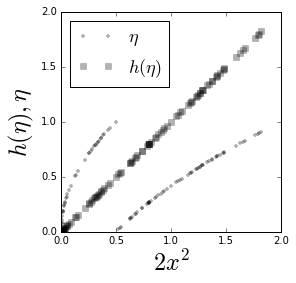

In [34]:
d = DataFrame(columns=['xi','eta','x','h','h1','h2'])
d.x = np.random.rand(100) # 100 random samples
d.xi = d.eval('2*x**2')
d['eta']=(d.x<0.5)*(2*d.x)+(d.x>=0.5)*(2*d.x-1)
d.h1=d[(d.x<0.5)].eval('eta**2/2')
d.h2=d[(d.x>=0.5)].eval('(1+eta)**2/2')
d.fillna(0,inplace=True)
d.h = d.h1+d.h2
fig,ax=subplots()
_=ax.plot(d.xi,d.eta,'.k',alpha=.3,label='$\eta$')
_=ax.plot(d.xi,d.h,'ks',label='$h(\eta)$',alpha=0.3)
_=ax.set_aspect(1)
_=ax.legend(loc=0,fontsize=18)
_=ax.set_xlabel('$2 x^2$',fontsize=24)
_=ax.set_ylabel('$h(\eta),\eta$',fontsize=24)
fig.tight_layout()
#fig.savefig('fig-probability/Conditional_expectation_MSE_Ex_006.png')

<!-- dom:FIGURE: [fig-probability/Conditional_expectation_MSE_Ex_006.png, width=500 frac=0.85] The diagonal line shows where the conditional expectation equals the $\xi$ function. <div id="fig:Conditional_expectation_MSE_006"></div> -->
<!-- begin figure -->
<div id="fig:Conditional_expectation_MSE_006"></div>

<p>The diagonal line shows where the conditional expectation equals the $\xi$ function.</p>
<img src="fig-probability/Conditional_expectation_MSE_Ex_006.png" width=500>

<!-- end figure -->


Extending projection methods to random variables provides multiple ways for
calculating solutions to conditional expectation problems. In this section, we
also worked out corresponding simulations using a variety of Python modules. It
is always advisable to have more than one technique at hand to cross-check
potential solutions. We worked out some of the examples in Brzezniak's
book using our methods as a way to show multiple ways to solve the same
problem. Comparing Brzezniak's measure-theoretic methods to our less abstract
techniques is a great way to get a handle on both concepts, which are important
for advanced study in stochastic process.